In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

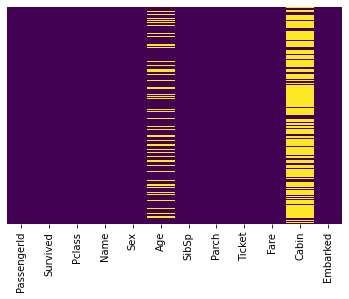

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = "viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

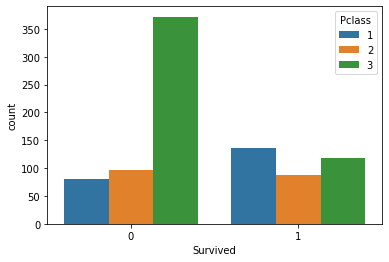

In [27]:
sns.countplot(x = "Survived", hue = "Pclass", data = train)

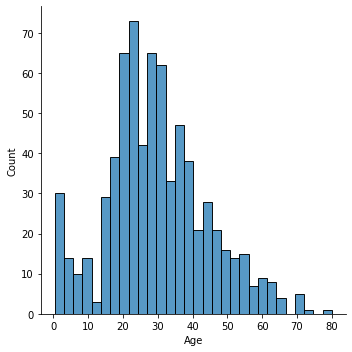

In [35]:
sns.displot(train["Age"].dropna(), kde = False, bins = 30)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

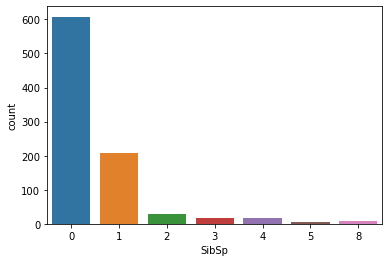

In [37]:
sns.countplot(x = "SibSp", data = train)

<AxesSubplot:>

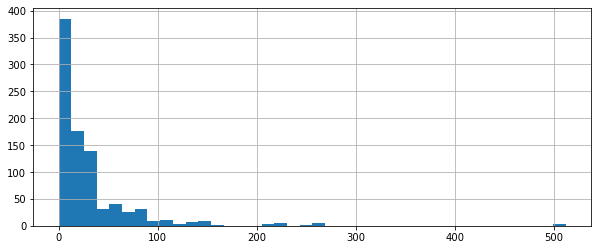

In [52]:
train["Fare"].hist(bins = 40, figsize = (10,4))

In [53]:
import cufflinks as cf
cf.go_offline()

In [57]:
train["Fare"].iplot(kind = "hist", bins = 30)

<AxesSubplot:>

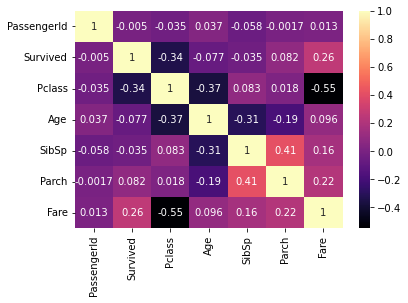

In [60]:
sns.heatmap(train.corr(), annot = True, cmap = "magma")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

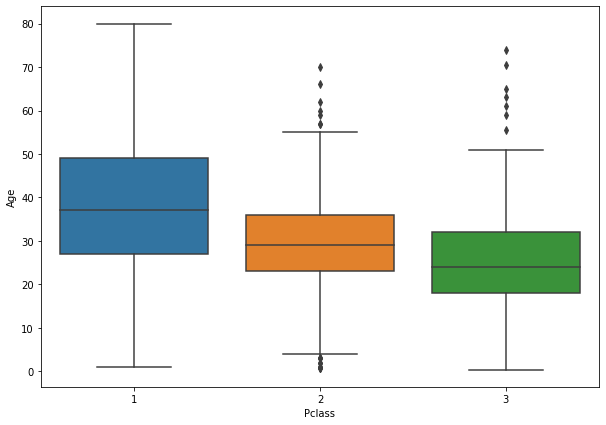

In [62]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "Pclass", y = "Age", data = train)

In [68]:
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [69]:
train["Age"] = train[["Age","Pclass"]].apply(impute_age, axis = 1)

<AxesSubplot:>

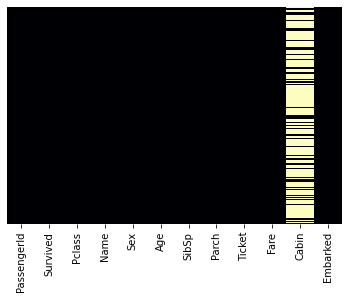

In [75]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "magma")

In [76]:
train.drop("Cabin", axis = 1, inplace = True)

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

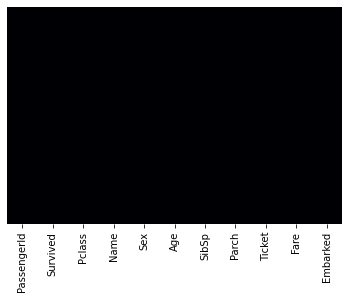

In [80]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "magma")

In [88]:
sex = pd.get_dummies(train["Sex"], drop_first = True)

In [90]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [100]:
embark = pd.get_dummies(train["Embarked"], drop_first = True)

In [101]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [102]:
train = pd.concat([train, sex, embark], axis = 1)

In [104]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [105]:
train.drop(["Sex","Embarked","Name","Ticket"], axis = 1, inplace = True)

In [112]:
train.drop("PassengerId", axis = 1, inplace = True)

In [113]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [115]:
X = train.drop("Survived", axis = 1)
y = train["Survived"]

In [116]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [121]:
from sklearn.linear_model import LogisticRegression

In [129]:
logmodel = LogisticRegression(max_iter = 10000)

In [130]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [131]:
predictions = logmodel.predict(X_test)

In [133]:
from sklearn.metrics import classification_report

In [135]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [136]:
from sklearn.metrics import confusion_matrix

In [142]:
confusion_matrix(y_test, predictions)

array([[134,  20],
       [ 38,  76]], dtype=int64)